In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# アフィン変換 : 平行移動 

cv2.warpAffine() : 第一引数が画像, 第二引数が変換行列, 第三引数が出力画像のサイズ

In [2]:
def affine_shift(img,tx,ty):
    H,W,L = img.shape
    
    M = np.array([[1,0,tx],[0,1,ty]],dtype=np.float32)
    out = cv2.warpAffine(img,M,(W,H))
    return out

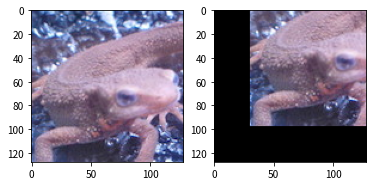

In [4]:
img = cv2.imread("./img/imori.jpg")

out = affine_shift(img,30,-30)
plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# アフィン変換 : 拡大縮小

In [6]:
def affine_scale(img,ax,ay):
    H,W,L = img.shape
    
    M = np.array([[ax,0,0],[0,ay,0]],dtype=np.float32)
    out = cv2.warpAffine(img,M,(int(W*ax),int(H*ay)))
    return out

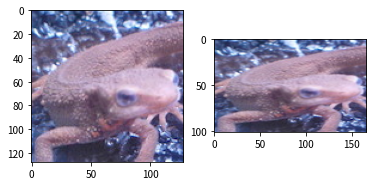

In [7]:
img = cv2.imread("./img/imori.jpg")

out = affine_scale(img,1.3,0.8)
plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# アフィン変換 : 回転操作

In [14]:
def affine_rotate(img,th):
    H,W,L = img.shape
    # ラジアンに変換
    th = th/180*np.pi
    
    M = np.array([[np.cos(th),np.sin(th),0],[-np.sin(th),np.cos(th),0]],dtype=np.float32)
    out = cv2.warpAffine(img,M,(H,W))
    return out

## 原点回りに回転

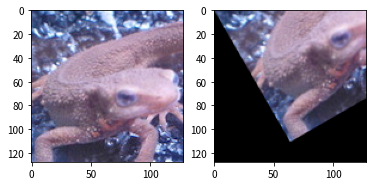

In [15]:
img = cv2.imread("./img/imori.jpg")

out = affine_rotate(img,30)
plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

## 画像の中心周りに回転

In [20]:
def affine_rotate_center(img,th):
    H,W,L = img.shape
    
    affine = cv2.getRotationMatrix2D((W/2.0, H/2.0), th, 1.0)
    out = cv2.warpAffine(img, affine, (W, H))
    return out

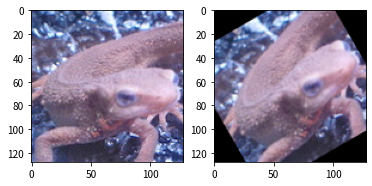

In [22]:
img = cv2.imread("./img/imori.jpg")

out = affine_rotate_center(img,30)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# アフィン変換 : スキュー

In [24]:
def affine_skew(img,dx,dy):
    H,W,L = img.shape
    sx,sy = dx/W,dy/H
    
    M = np.array([[1,sx,0],[sy,1,0]],dtype=np.float32)
    out = cv2.warpAffine(img,M,(W+dx,H+dy))
    return out

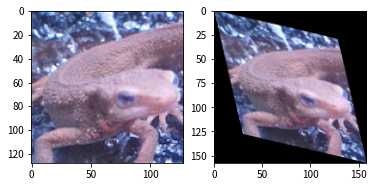

In [25]:
img = cv2.imread("./img/imori.jpg")

out = affine_skew(img,30,30)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()